<div align="center">

# CMSC 320 Final Project: How Much Does Electricity Cost the US?

##### A Tutorial and Analysis by Jay Desmarais
***

</div>

<div align="center">

### Introduction

</div>

With a rising concern for the world's health and climate change, all things energy are a big topic. Researchers are finding the best ways to harness renewable energy efficiently, companies are turning away from the use of fossil fuels, people are buying electric cars, and electric people are starting to rely on their electric companies a little less, by installing their own solar panels. With all this happening, there are still large providers in every state that a huge portion of the United States rely on to get their electricity, and over the years, their means of obtaining and distributing said electricity may vary, whether they start relying more on nuclear plants, solar panels, or other more renewable sources, but how has this, among many other obstables, investments, failures, or more impacted the price of electricity. 

To dive deeper into understanding the pricing of electricity throughout the United States, will take a look at the U.S Department of Energy's data on the average price of electricity in each US state from the years 1990 - 2020 in their dataset titled "Average Price (Cents/kilowatthour) by State by Provider, 1990-2020". By taking a look at this data, we hope to find possible trends in prices accross the nation, in specific states or regions, and across time.

This analysis and tutorial will take a look at and walk through an example set of data and it's analysis to help guide the reader to be able to do their own analysis on a dataset of their choosing. This tutorial will focus on "The Data Science Pipeline", which is used as a process to collect data, manage it, explore results, and test against it. It consists of 5 main phases that we will touch on:

- Data Collection/curation + parsing
- Data Management
- Exploratory Data Analysis
- Hypothesis Testing
- Communication of insights attained

<div align="center">

### Required Tools and Libraries

</div>

The following tools and libraries are required for different aspects of this tutorial:

1. urllib.request 
2. pandas
3. numpys
4. matplotlib.pyplot
5. seaborn
6. json

To import these packages, the following code can be used: 

In [177]:
import urllib.request as request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

<div align="center">

### Data Collection

</div>

This phase consists of finding a data set. This can be done by searching online and finding links to datasets, or finding downloads to save to your working directory. In the below example, I searched data.gov for an aggregate of datasets published by the Department of Energy. By doing so, I found a link to a json file that contains a json object of datasets collected and maintained by the Dept. of Energy. Once this json link was acquired, I used the urllib.request and json libraries to open and read in the json file to a json object. This takes the contents of that file and stores them in a variable named 'data' that I can later manipulate. Using this json object, I then went through all of the datasets until I found the one that I wanted to use, which I did by searching for the object with the title "Annual Electricity Price by State". I knew this was the title of the information I wanted beceause I looked throught the object manually to find the dataset I would like to access, but there were many more interesting datasets that can be used for further exploration. Once I found this specific dataset, I parsed through it to find the url of the excel spreadsheet that contained the data and used df.read_excel to read it in, making sure to specify which line the column headers are on. This stored the dataset in a pandas dataframe, which acts as a table with multiple rows and columns of the data that can be easily manipulated to further explore the data.

To read more about these specific functions or libraries and their uses, you can use the following resources:

- Department of Energy Open Data: https://dashboard.data.gov/offices/detail/49019/2021-12-31#metrics_total_records 
- urllib.request: https://docs.python.org/3/library/urllib.request.html
- json: https://docs.python.org/3/library/json.html
- pandas: https://pandas.pydata.org/docs/index.html
- pandas.read_excel: https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html
- pandas.DataFrame: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [178]:

url = "https://www.energy.gov/sites/default/files/2022-05/PDL-05-04-2022.json"
response = request.urlopen(url)
data = json.loads(response.read())

for dataset in data['dataset']:
    if dataset['title'] == 'Annual Electricity Price by State':
        energy_dataset = dataset
        break

data_url = energy_dataset['distribution'][0]['downloadURL']

df = pd.read_excel(data_url, header=1)

df

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
0,2020,AK,Total Electric Industry,22.57,19.58,15.88,0.00,NaN,19.82
1,2020,AL,Total Electric Industry,12.58,11.55,5.87,0.00,NaN,9.84
2,2020,AR,Total Electric Industry,10.41,8.61,5.89,13.32,NaN,8.32
3,2020,AZ,Total Electric Industry,12.27,10.11,6.07,9.38,NaN,10.44
4,2020,CA,Total Electric Industry,20.45,17.53,14.27,10.07,NaN,18.00
...,...,...,...,...,...,...,...,...,...
4600,1990,WA,Full-Service Providers,4.39,4.15,2.39,NaN,3.13,3.40
4601,1990,WI,Full-Service Providers,6.63,5.78,3.99,NaN,6.47,5.37
4602,1990,WV,Full-Service Providers,5.90,5.36,3.56,NaN,8.19,4.73
4603,1990,WY,Full-Service Providers,5.97,5.17,3.47,NaN,7.90,4.21


Now that we have the data properly formatted in a pandas DataFrame, we can clearly see the format of this data. This data is collected each year in each of the states across the US and contains the avaerage residential, commercial, and industrial, transportation, and other costs of electricity by provider company. This results in a total of 4605 rows of data and 9 columns, labeled "Year", "State", "Industry Sector Category", "Residential", "Commercial", "Industrial", "Transportation", "Other", and "Total".

<div align="center">

### Data Management and Representation

</div>

After the data has been collected, we want to find ways to manage the data so it can be used properly later in the data analysis phase. Some things that you may want to consider as part of your data are the data types represented in each column, and any missing values. When you are managing your data, even when the data seems to be fully filled out, there may be some missing data. In our case, all years 2002 and prior have missing values in the 'Transporation' column, but values in the 'Other' column, but every year post 2002 has that switched, with values in the 'Transportation' column, but not in the 'Other' column. Because of this, we will be handling our missing data by setting it all to 0 and then combining the 'Transportation' and 'Other' columns into one. You can see this here:

In [179]:
df = df.fillna(0)
df['Other'] = df['Other'] + df['Transportation']
df = df.drop(['Transportation'], axis=1)

df

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Other,Total
0,2020,AK,Total Electric Industry,22.57,19.58,15.88,0.00,19.82
1,2020,AL,Total Electric Industry,12.58,11.55,5.87,0.00,9.84
2,2020,AR,Total Electric Industry,10.41,8.61,5.89,13.32,8.32
3,2020,AZ,Total Electric Industry,12.27,10.11,6.07,9.38,10.44
4,2020,CA,Total Electric Industry,20.45,17.53,14.27,10.07,18.00
...,...,...,...,...,...,...,...,...
4600,1990,WA,Full-Service Providers,4.39,4.15,2.39,3.13,3.40
4601,1990,WI,Full-Service Providers,6.63,5.78,3.99,6.47,5.37
4602,1990,WV,Full-Service Providers,5.90,5.36,3.56,8.19,4.73
4603,1990,WY,Full-Service Providers,5.97,5.17,3.47,7.90,4.21



The way you handle missing data can vary, but you always want to handle it in a way that makes sense with your data and how you are evaluating it. To learn more about missing data in pandas, visit https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/.

These data types can be put into two main categories: Numerical data and Categorical data. Numerical data is data that uses integers or real numbers to express the data. This can be further broken down into interval scale or ratio scale.Interval scale represents data with a fixed but arbitrary interval, like dates, and degrees farenheit, where ratio scale is a scale of measurement that posesses a true-zero origin, like degrees kelvin or weight in grams. Categorical data on the other hand, is data that takes a value from a finite set, and can be further brokwn down into nominal data and ordinal data. Nominal data has values with names or categories, like in marital status or color, where ordinal data has a sort of ordering over the values, like in ratings ("strongly like", "like", "neutral", "strongly dislike"). To learn more about these types of data, you can visit https://www.voxco.com/blog/categorical-data-vs-numerical-data/.

Based on different data types, there may be certain things that you want to do to manipulate your data and explore the relationships between the variables collected in the dataset. To demonstrate this, we will work to manage and represent our data in different ways by collecting different groupings, averages, and more, into different smaller, more focused DataFrames, or by creating new columns in the data tables, which can be seen here:

In [188]:
yearly_averages = df.loc[df['State'] == 'US'].groupby('Year').mean()

yearly_industry_averages = df.loc[df['State'] == 'US']

state_groupings = df.loc[df['State'] != 'US'].groupby('State')

industry_groupings = df.loc[df['State'] != 'US'].groupby('Industry Sector Category')

Above this, we have created two new dataframes and three groupings. The two dataframes contain yearly price averages across the united states, one of which is further divided by industry. The three groupings group the data by a certain variable, each of the three being based on year, state, and company. These find all states that aren't "US" (A "US" state is included as a industry average for each year across all the states they serve) and puts them in groups by either year, state, or industry.

Now that the data is grouped and formatted how we like, we can move to the next step, analyzing the data.

<div align="center">

### Exploratory Data Analysis

</div>

During the data analysis phase, we want to take a look at and visualize the data in different ways. To do this, we will chart the data in multiple different ways. By doing so, we can find trends or certain supporting analysis for any claims or predictions we may have about the data. 

In our case, we will be plotting each of our formatted groups and dataframes to visualize what the data may be showing. To chart out our results, we will use tools like matplotlib.pyplot and seaborns. These tools help to simply graph out data and add titles, legends, and more. To learn more about these tools, visit their websites at https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html and https://seaborn.pydata.org respectively.

Text(0, 0.5, 'Average Total Price (Cents/Kilowatthour)')

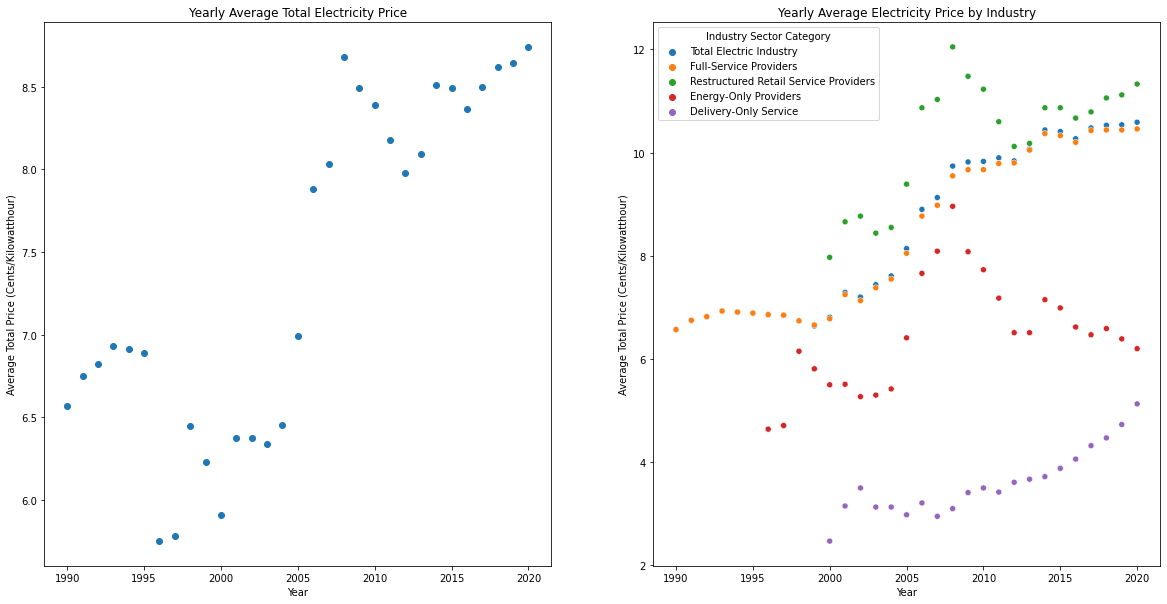

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

x = yearly_averages.axes[0].values
y = yearly_averages['Total'].values

ax[0].scatter(x, y)
ax[0].set_title('Yearly Average Total Electricity Price')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Total Price (Cents/Kilowatthour)')

x = yearly_industry_averages['Year'].values
y = yearly_industry_averages['Total'].values

ax[1] = sns.scatterplot(\
        data=yearly_industry_averages,
        ax=ax[1],
        x='Year',
        y='Total',
        hue='Industry Sector Category')
ax[1].set_title('Yearly Average Electricity Price by Industry')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Total Price (Cents/Kilowatthour)')

Here we can start to see a trend. In the first graph, we see a general upward trend across the years, based on the average total price across the whole United states, but this can be broken down more into smaller pieces. On the right, we have done this. We now have the average total broken down even more, by sector. This shows us that each individual sector, although introduced at different times, and having different price ranges, all fit the same general linear increase across time.

Next we will break this down even further and see if specific states are a cause for any anomolies or new findings.

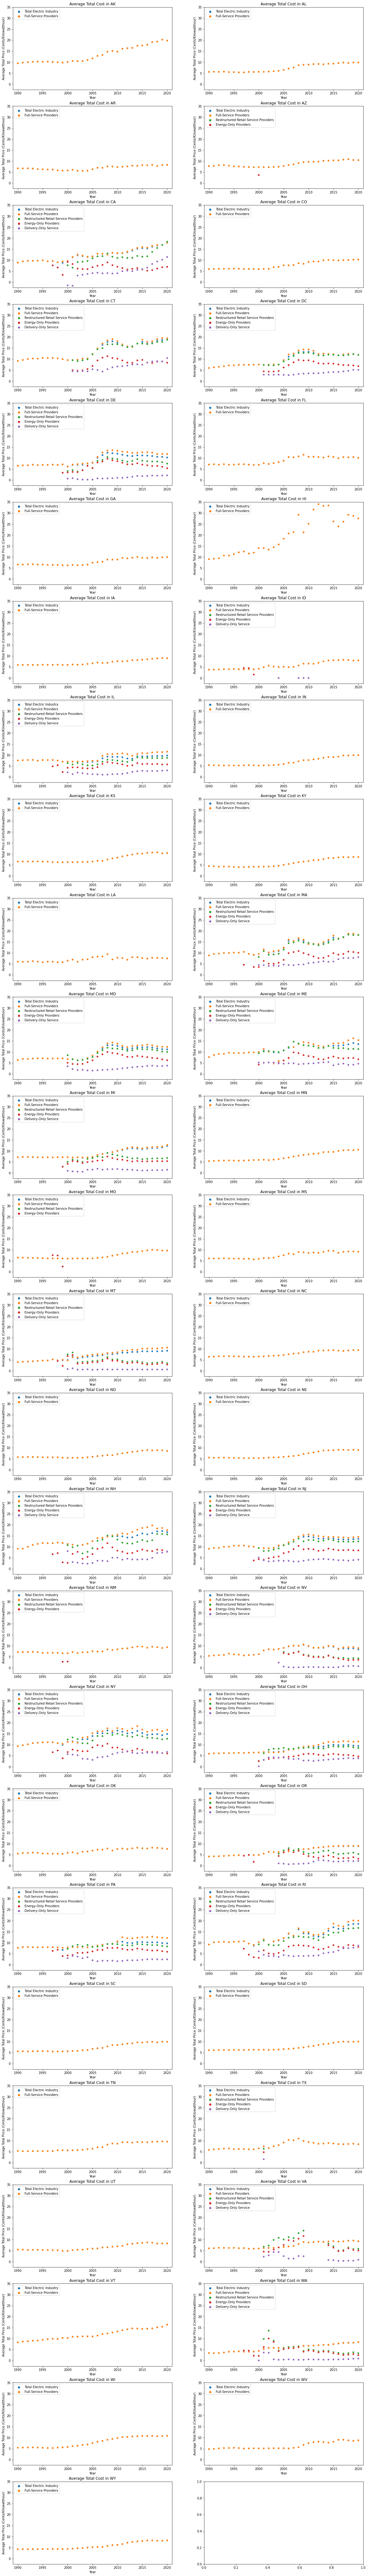

In [190]:
fig, ax = plt.subplots(26, 2, figsize=(20, 150))

i = 0; j = 0
for key, group in state_groupings:
    sns.scatterplot(\
        data=group,
        ax=ax[j][i],
        x='Year',
        y='Total',
        hue='Industry Sector Category')

    ax[j][i].set(ylim = (-2.5, 35), xlim = (1989, 2021))
    ax[j][i].legend(loc='upper left')
    ax[j][i].set_title('Average Total Cost in {}'.format(key))
    ax[j][i].set_ylabel('Average Total Price (Cents/Kilowatthour)')

    if i > 0:
        j += 1; i = 0
    else: 
        i += 1

Now we can see a larger relationship between State and price, with some states, like Hawaii, pricing their elecricity significantly higher than other states. There are also certain sectors that aren't in a few of the states at all, which has some sort of cause or effect when you look at the data in either way.

To further break down this comparison between the sectors and their prices in each state, we will now use the industry grouping to plot all the prices by year for each industry, and include the state's colors in the graph to get an idea where each state lies within a certain industries price ranges.

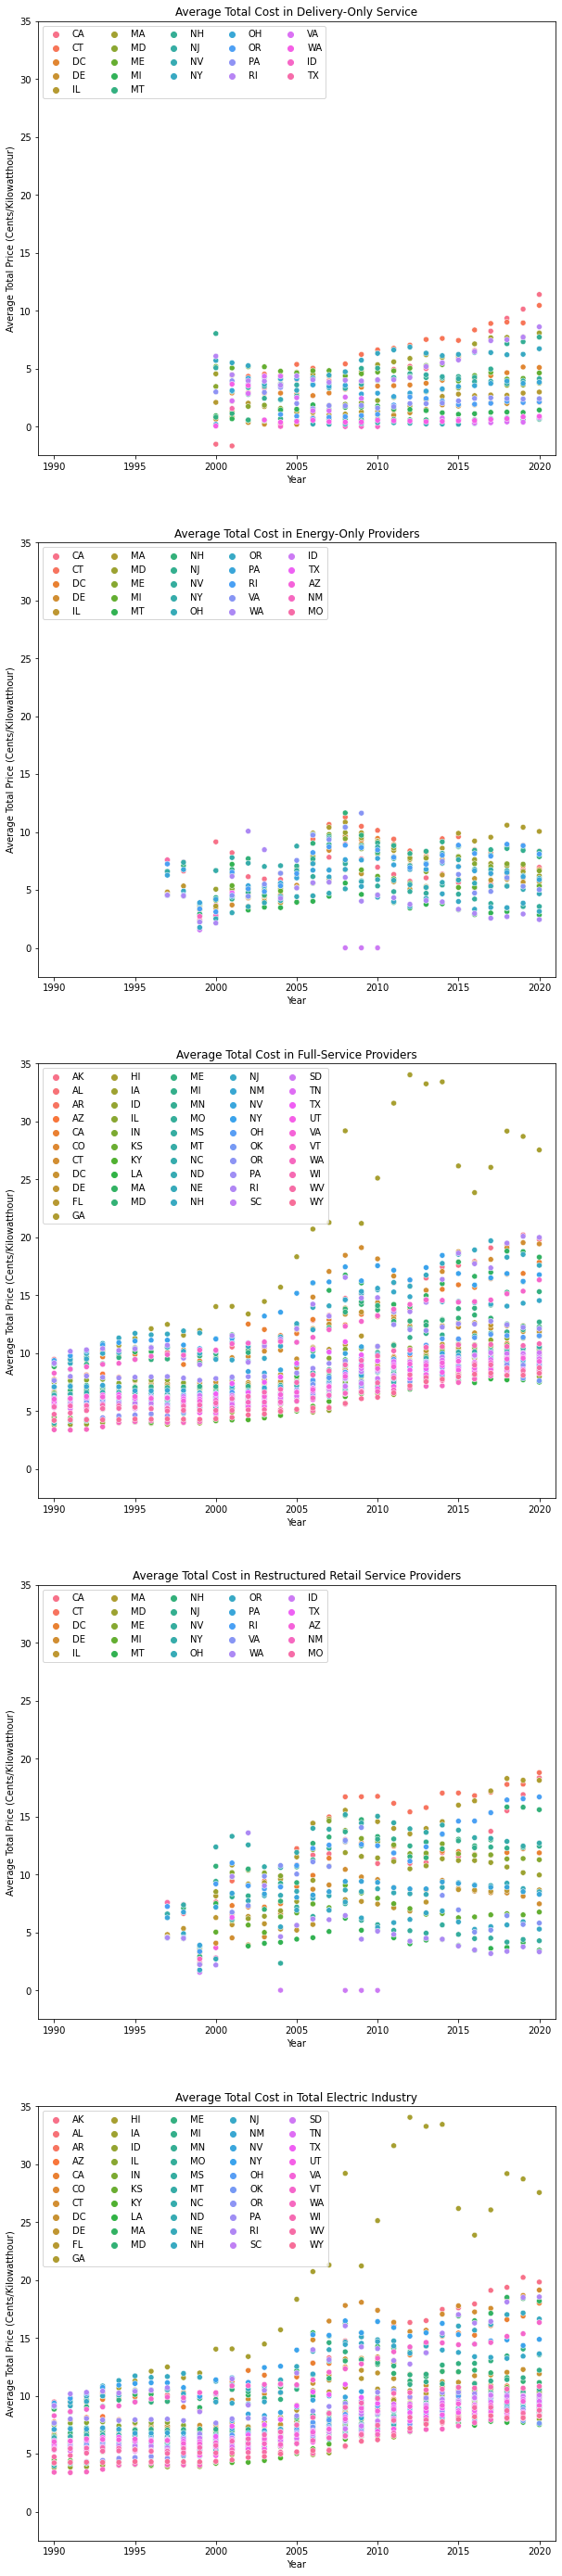

In [199]:
fig, ax = plt.subplots(5, 1, figsize=(10, 50))

i = 0
for key, group in industry_groupings:
    sns.scatterplot(\
        data=group,
        ax=ax[i],
        x='Year',
        y='Total',
        hue='State')

    ax[i].set(ylim = (-2.5, 35), xlim = (1989, 2021))
    ax[i].set_title('Average Total Cost in {}'.format(key))
    ax[i].set_ylabel('Average Total Price (Cents/Kilowatthour)')
    ax[i].legend(loc='upper left', ncol=5)

    i += 1

Now that we have our data visualized, we can begin to draw hypotheses about this information and what it may or may not mean in terms of how one variable can effect another. This is where we hop on over to our Hypothesis Testing phase of the data sciece pipeline.

<div align="center">

### Hypothesis Testing

</div>

<div align="center">

### Communication of Insights Attained

</div>